# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 6


### Zadanie 1

Zaimplementuj symulację paradoksu Monty'ego Halla. Np. po 10 000 rozgrywek dla obu przypadków (kiedy gracz zostaje przy wybranej bramke oraz kiedy gracz zmienia wybór).
Czy wnik symulacji jest zgodny z teorią? 

Z [Wikipedii](https://pl.wikipedia.org/wiki/Paradoks_Monty%E2%80%99ego_Halla):

> Zawodnik stoi przed trzema zasłoniętymi bramkami. Za jedną z nich (za którą – wie to tylko prowadzący program) jest nagroda (umieszczana całkowicie losowo). Gracz wybiera jedną z bramek. Prowadzący program odsłania inną bramkę (co istotne – anonsując, że jest to bramka pusta), po czym proponuje graczowi zmianę wyboru. <br /><br />
Intuicyjnie nie ma znaczenia, czy zawodnik pozostanie przy swoim wyborze, czy nie. Okazuje się jednak, że jest inaczej. Przy wyborze strategii pozostawania przy swoim pierwszym wyborze prawdopodobieństwo wygranej wynosi 1/3. Natomiast przy wyborze „strategii zmiany” wynosi 2/3. <br /><br />
Oznacza to, że zawodnikowi opłaci się zmienić bramkę, ponieważ ma wtedy dwa razy większe szanse na wygraną. Paradoks wynika z niedocenienia informacji, jaką „między wierszami” przekazuje prowadzący. Informacją tą jest wskazanie pustej bramki. <br /><br />
Innymi słowy poprzez otwarcie jednej z pustych bramek prowadzący zmniejsza liczność zbioru „pustych bramek”, a w rezultacie prawdopodobieństwo przegranej z 2/3 do 1/3. „Pozostałe” prawdopodobieństwo wygranej musi wynosić więc obecnie 2/3.
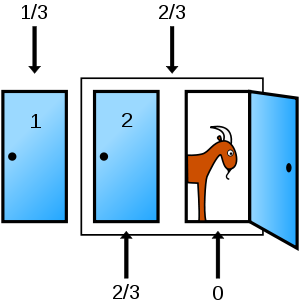




In [1]:
import random

def get_doors(doorNumber):
    lst = [True]+[False]*(doorNumber-1)
    return(lst)

def monty_hall(iteration, change_orig, doorNumber):
    win = 0
    for i in range(iteration):
        change = change_orig
        doors = get_doors(doorNumber)
        random.shuffle(doors)
        door_dic = {x:i for x, i in enumerate(doors)}
        
        index_of_price = doors.index(True)
        player_pick = random.randint(0, doorNumber - 1) 
        host_pick = random.randint(0, doorNumber - 1) 
        
        while host_pick == index_of_price or host_pick == player_pick:
            host_pick = random.randint(0, doorNumber - 1)
        
        door_dic.pop(host_pick)
        key_lst = list(door_dic.keys())
        player_pick_new = player_pick
        
        while change:
            player_pick_new = random.choice(key_lst)
            if player_pick != player_pick_new:
                change = False
            
        if door_dic[player_pick_new] == True:
            win += 1
        
    print(win/iteration)
            
    

monty_hall(10000, True, 3)  

0.6618


### Zadanie 2

#### A)
Wczytaj z klawiatury $m$ liter (mogą się powtarzać), a następnie wypisz wszystkie permutacje tych $m$ liter, podkreślając te, które tworzą poprawne polskie słowa (na podstawie słownika ściągniętego i wypakowanego z https://sjp.pl/sl/growy/).

Warunki:
- W jednej linii należy wypisać 5 permutacji, po czym przejść do nowego wiersza.
- Jeśli wprowadzony napis zawiera znaki spoza `[a-z]` (tylko litery łacińskie), to należy wypisać stosowny komunikat.
- Wprowadzone litery mogą się powtarzać, ale permutacji wtedy nie powtarzamy. 
Przykładowo, dla wprowadzonego ciągu `aaab` program ma wypisać tylko 4 permutacje (w dowolnej kolejności): `aaab`, `aaba`, `abaa`, `baaa`.

Przykład:

```
Podaj 4 litery z [a-z]: aatm
aatm    aamt    atam    atma    amat

amta    taam    tama    tmaa    maat
                ----
mata    mtaa
----
```

#### B)
Napisz wzór, który umożliwi wyświetlenie liczby tak opisanych permutacji bez konieczności ich generowania.



In [2]:
with open('slowa.txt', encoding='UTF-8') as f:
    myfile = f.readlines()
words = []
for word in myfile:
    word = word[:-1]
    words.append(word)

In [26]:
import math

def valid(lst):
    valid_lst = dict.fromkeys(lst)
    return valid_lst
    

def permutations(string, step=0,lst=[]):
    if step == len(string):
        lst.append("".join(string))
    for i in range(step, len(string)):
        string_copy = [c for c in string]
        string_copy[step], string_copy[i] =string_copy[i], string_copy[step]
        permutations(string_copy, step + 1, lst)
    if len(lst) == math.factorial(len(string)):
        lst = valid(lst)
        return lst
    
userInput = input('Podaj m liter z [a-z]:')
myDict = permutations(userInput)

for test_string in myDict:
    if test_string in words:
        myDict[test_string] = ('-'*len(test_string))
    else:
        myDict[test_string] = (' '*len(test_string))

key_list = list(myDict)
values_list = list(myDict.values())

for i in range(int(len(key_list)/5+1)):
    print("    ".join(key_list[i*5:(i+1)*5]) + "\n")
    print("    ".join(values_list[i*5:(i+1)*5]) + "\n")


Podaj m liter z [a-z]:test
test    tets    tset    tste    ttse

----                                

ttes    etst    etts    estt    sett

                                    

stet    stte

----        



# Wzór

In [79]:
stringList = [c for c in userInput]
noDuplicates = list(valid(stringList))

nominator = math.factorial(len(stringList))
count_lst = []
for c in noDuplicates:
    count_lst.append(stringList.count(c))
denominator = 1
for i in count_lst:
    count = math.factorial(i)
    denominator *= count
    
count =  nominator/denominator
print(count)

12.0
